## Instructions and Information
* Clone the git repo: !git clone https://github.com/SudharshanShanmugasundaram/Music-Generation.git
* Then go to the folder "Music-Generation/notebooks"
* Then put this file in this folder, that is, in "Music-Generation/notebooks"
* Everything should work now
* This is written in tutorial style explaining each modules in detail
* Note that there were some changes required in original notebook to make it run. This notebook runs.
* Generate files and upload 

The code block below is used to install Python libraries using `pip`, which is the package installer for Python. These installations are necessary for running specific functionalities in a Python notebook. Here's a breakdown of each command:

1. `!pip install matplotlib`
   - **Purpose**: Installs the `matplotlib` library.
   - **Usage**: `matplotlib` is a plotting library in Python that allows you to create a wide variety of static, animated, and interactive visualizations in Python. It's particularly useful for visualizing data and results in machine learning projects.

2. `!pip install scikit-image`
   - **Purpose**: Installs the `scikit-image` library.
   - **Usage**: `scikit-image` (or skimage) is a collection of algorithms for image processing in Python. It is useful for tasks such as image manipulation, enhancement, segmentation, and feature extraction, which might be relevant if your project involves any form of image data processing.

3. `!pip install matplotlib`
   - **Purpose**: This line is a duplicate of the first command and installs `matplotlib` again.
   - **Usage**: Having this line again might be an error or oversight, as repeating the installation command is generally unnecessary unless addressing a specific dependency issue.

In a Python notebook, lines starting with `!` are shell commands, which means they are executed in the system's command line (outside of Python). These commands are often used in notebooks to install packages or perform other system-level tasks.


In [1]:
!git clone --recursive https://github.com/SudharshanShanmugasundaram/Music-Generation.git

Cloning into 'Music-Generation'...
remote: Enumerating objects: 1095, done.
remote: Total 1095 (delta 0), reused 0 (delta 0), pack-reused 1095
Receiving objects: 100% (1095/1095), 3.32 MiB | 3.66 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Checking out files: 100% (1077/1077), done.


In [ ]:
!pip install matplotlib
!pip install scikit-image
!pip install matplotlib
!pip install pandoc

This block of Python code below handles importing various modules and libraries, which are necessary for different aspects of working with data, file systems, neural networks, and specifically in this context, likely for a project involving music generation with neural networks. Let’s break down the imports and their purposes:

1. **`import os`**
   - **Purpose**: Imports the Python `os` module.
   - **Usage**: This module provides a way of using operating system dependent functionality like reading or writing to the filesystem, navigating directories, etc. It's useful for handling files and directory paths.

2. **`import sys`**
   - **Purpose**: Imports the Python `sys` module.
   - **Usage**: This module provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter. It is commonly used for manipulating the Python runtime environment, such as the path for module search.

3. **`import random`**
   - **Purpose**: Imports the Python `random` module.
   - **Usage**: This module implements pseudo-random number generators for various distributions. It’s useful for any functionality that requires randomization, such as shuffling data or randomly initializing weights in neural networks.

4. **`sys.path.append('../midi')`**
   - **Purpose**: Modifies the `sys.path`, which is a list of strings that determines the interpreter’s search path for modules.
   - **Usage**: By appending a path to `sys.path`, you can include specific directories to look for Python modules. Here, `'../midi'` likely refers to a directory that contains custom modules or scripts for handling MIDI music data, making them available for import in the current script.

5. **`import torch`**
   - **Purpose**: Imports the `torch` package.
   - **Usage**: `torch` is the main module of PyTorch, which is a popular library for building and training neural networks. PyTorch provides flexibility and speed in building deep learning models.

6. **`import torch.nn as nn`**
   - **Purpose**: Imports the `nn` module from PyTorch under the alias `nn`.
   - **Usage**: This module includes classes and functions to build neural networks. `nn` contains all the building blocks for creating neural networks, such as layers, activation functions, etc.

7. **`from torch.autograd import Variable`**
   - **Purpose**: Imports the `Variable` class from the `torch.autograd` module.
   - **Usage**: In earlier versions of PyTorch, `Variable` was used to wrap tensor objects to aid in automatic differentiation by building a computational graph. However, in recent versions of PyTorch (0.4 and later), `Variable` has been deprecated as Tensor itself supports autograd directly.

8. **`import torch.utils.data as data`**
   - **Purpose**: Imports the `data` utility module from PyTorch.
   - **Usage**: This module provides tools for handling datasets in PyTorch. It includes utilities for creating data loaders, which can be used to efficiently load data in batches during training or testing of neural networks.


In [28]:
%matplotlib inline
import os
import sys
import random
sys.path.append('./Music-Generation/midi')

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as data
from tqdm.notebook import tqdm

This block of code continues to set up the environment for a project, in this case, related to processing and generating MIDI music files using neural networks, with specific utilities for input/output and visualization. Here's a detailed breakdown of each line:

1. **`from midi_utils import midiread, midiwrite`**
   - **Purpose**: Imports the `midiread` and `midiwrite` functions from a custom module named `midi_utils`.
   - **Usage**: These functions are presumably designed to handle MIDI file input and output operations. `midiread` might be used to read MIDI files into a format suitable for processing by the neural network, while `midiwrite` could be used to convert the network's output back into a MIDI file.

2. **`from matplotlib import pyplot as plt`**
   - **Purpose**: Imports the `pyplot` module from `matplotlib` under the alias `plt`.
   - **Usage**: `pyplot` provides a MATLAB-like plotting framework. It is widely used for generating plots and visualizations of data, which are essential for analyzing and presenting results in many data-intensive applications.

3. **`import skimage.io as io`**
   - **Purpose**: Imports the `io` module from the `skimage` (scikit-image) library under the alias `io`.
   - **Usage**: This module is used for reading and writing images. In the context of MIDI music generation, it might be used if the project involves any image processing tasks, such as visualizing spectrograms or other graphical representations of audio data.

4. **`from IPython.display import FileLink`**
   - **Purpose**: Imports the `FileLink` class from the `IPython.display` module.
   - **Usage**: `FileLink` is used to create a link to a file on the server, allowing users to download it by clicking the link. This can be particularly useful in a notebook environment for easily downloading generated MIDI files or logs.

5. **`os.environ["CUDA_VISIBLE_DEVICES"] = '0'`**
   - **Purpose**: Sets the `CUDA_VISIBLE_DEVICES` environment variable to `'0'`.
   - **Usage**: This line configures which GPUs are visible to CUDA applications, a feature of NVIDIA's CUDA toolkit. By setting it to `'0'`, the code restricts CUDA to only use the first GPU on a multi-GPU system. This is crucial in environments where multiple GPUs are present and specific ones are allocated for different tasks or users.


In [6]:
from midi_utils import midiread, midiwrite
from matplotlib import pyplot as plt
import skimage.io as io
from IPython.display import FileLink
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

# DataLoader

This block of Python code includes two primary functions, designed to work with MIDI data and prepare it for processing in a neural network, such as LSTM for music generation. Let's break down the imports and each function:

### Imports
1. **`import numpy as np`**
   - **Purpose**: Imports the NumPy library as `np`.
   - **Usage**: NumPy is a fundamental package for scientific computing in Python. It is used for handling large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

2. **`import torch`**
   - **Purpose**: Imports the PyTorch library.
   - **Usage**: PyTorch is a popular open-source machine learning library used for applications such as computer vision and natural language processing, focused on deep learning models.

3. **`import torch.utils.data as data`**
   - **Purpose**: Imports the `data` utility module from PyTorch.
   - **Usage**: Provides tools for handling datasets in PyTorch, useful for creating data loaders for efficiently loading data in batches during model training.

### Function `midi_filename_to_piano_roll`
This function converts a MIDI file into a "piano roll" format, which is a common way to represent MIDI data for machine learning applications.

- **Parameters**: Takes a single argument, `midi_filename`, which is the path to the MIDI file.
- **Process**:
  - Reads the MIDI file using `midiread` with a specified time resolution (`dt=0.3`). This function likely converts the MIDI file into a time-step-based representation where each step represents 0.3 seconds.
  - Transposes the resulting `piano_roll` data so that time progresses along one axis and pitch values are along the other.
  - Converts any positive values in the `piano_roll` (indicating a pressed note) to 1. This is a common preprocessing step to simplify the data, focusing only on whether a note is played rather than its velocity or intensity.
- **Return**: Returns the processed piano roll, a binary matrix indicating the presence or absence of notes.

### Function `pad_piano_roll`
This function pads a piano roll array to a specified maximum length, ensuring that all input data fed into the neural network has a uniform size.

- **Parameters**:
  - `piano_roll`: The piano roll to pad.
  - `max_length`: The maximum length to which the piano roll should be padded, with a default value of 132333.
  - `pad_value`: The value used to fill in the padding, default is 0.
- **Process**:
  - Determines the original length of the `piano_roll`.
  - Creates a new matrix of zeros (`pad_value`) with the same number of rows as the piano roll (representing different pitches, typically 88 for a standard piano) and columns equal to `max_length`.
  - Copies the original piano roll into the rightmost part of the new padded matrix, aligning the end of the original piano roll with the end of the padded matrix.
- **Return**: Returns the padded piano roll, ensuring uniform input size for model training or evaluation.


In [7]:
import numpy as np
import torch
import torch.utils.data as data


def midi_filename_to_piano_roll(midi_filename):
    
    midi_data = midiread(midi_filename, dt=0.3)
    
    piano_roll = midi_data.piano_roll.transpose()
    
    # Pressed notes are replaced by 1
    piano_roll[piano_roll > 0] = 1
    
    return piano_roll


def pad_piano_roll(piano_roll, max_length=132333, pad_value=0):
        
    original_piano_roll_length = piano_roll.shape[1]
    
    padded_piano_roll = np.zeros((88, max_length))
    padded_piano_roll[:] = pad_value
    
    padded_piano_roll[:, -original_piano_roll_length:] = piano_roll

    return padded_piano_roll

The `NotesGenerationDataset` class is a custom PyTorch dataset designed to handle MIDI files for a music generation task, such as training a neural network to predict subsequent notes. This class is tailored to load MIDI files, convert them into a structured format like piano rolls, manage variable sequence lengths, and prepare them for input into a machine learning model. Let's dissect each part of this class and its methods to understand their functionality and purpose.

### Class Definition and Constructor
- **`class NotesGenerationDataset(data.Dataset):`**
  - This class inherits from `data.Dataset`, which is a PyTorch class used for representing datasets in a way that's compatible with PyTorch's `DataLoader` for efficient batching, shuffling, and parallel data loading.

- **`def __init__(self, midi_folder_path, longest_sequence_length=1491):`**
  - **`midi_folder_path`**: The directory containing MIDI files.
  - **`longest_sequence_length`**: Optionally, the maximum length of sequences can be set explicitly. If not set, it defaults to 1491, or it can be dynamically calculated based on the longest MIDI file in the directory.
  - **`midi_filenames`**: Lists all files in the given directory.
  - **`midi_full_filenames`**: Constructs full paths to the MIDI files.
  - **`self.update_the_max_length()`**: If no maximum length is provided, this method is called to determine it from the data.

### Helper Method to Update Maximum Sequence Length
- **`def update_the_max_length(self):`**
  - This method calculates the maximum sequence length across all MIDI files, which is crucial to standardize the input shape for neural network training, particularly when using batch processing.
  - **`midi_filename_to_piano_roll(filename)`**: Presumably, this function converts a MIDI file into a piano roll format, where the second dimension (`shape[1]`) represents the time steps in the sequence.

### Length and Item Accessor Methods
- **`def __len__(self):`**
  - Returns the number of MIDI files in the dataset, a necessary implementation for any PyTorch `Dataset`.

- **`def __getitem__(self, index):`**
  - Returns a single processed item from the dataset at the specified `index`.
  - **`midi_full_filename`**: The path to the MIDI file for the given index.
  - **`piano_roll`**: The piano roll representation of the MIDI file.
  - **`input_sequence`** and **`ground_truth_sequence`**: The input sequence and the ground truth sequence for the model, created by shifting the piano roll by one time step. This setup is typical for prediction tasks where the model learns to predict the next step in the sequence.
  - **`pad_piano_roll`**: A function that pads sequences to a fixed length, ensuring consistent input sizes for batch processing. Special padding for the ground truth (`pad_value=-100`) might be used to denote padding in loss calculations, possibly to ignore these values during training.

### Data Formatting
- **`transpose()`**:
  - Transposes the sequences so that the time dimension comes first, aligning with the expected input shape for many sequence processing models in PyTorch (sequence length, batch size, feature dimension).
  
- **Return**:
  - Returns the padded and transposed input and ground truth sequences as tensors, along with the original sequence length before padding, packaged in a way suitable for direct use with a PyTorch model.

### Summary
The `NotesGenerationDataset` class is a comprehensive solution for preparing MIDI files for sequence prediction tasks in PyTorch, handling all aspects from data loading to preprocessing and formatting. This setup facilitates training machine learning models on music data by ensuring data consistency and compatibility with PyTorch's training loops and utilities.

In [8]:
class NotesGenerationDataset(data.Dataset):
    
    def __init__(self, midi_folder_path, longest_sequence_length=1491):
        
        self.midi_folder_path = midi_folder_path
        
        midi_filenames = os.listdir(midi_folder_path)
        
        self.longest_sequence_length = longest_sequence_length
        
        midi_full_filenames = map(lambda filename: os.path.join(midi_folder_path, filename),midi_filenames)
        
        self.midi_full_filenames = list(midi_full_filenames)
        
        if longest_sequence_length is None:
            
            self.update_the_max_length()
    
    
    def update_the_max_length(self):
        
        sequences_lengths = map(lambda filename: midi_filename_to_piano_roll(filename).shape[1],self.midi_full_filenames)
        
        max_length = max(sequences_lengths)
        
        self.longest_sequence_length = max_length
                
    
    def __len__(self):
        
        return len(self.midi_full_filenames)
    
    def __getitem__(self, index):
        
        midi_full_filename = self.midi_full_filenames[index]
        
        piano_roll = midi_filename_to_piano_roll(midi_full_filename)
        
        # Shifting by one time step
        sequence_length = piano_roll.shape[1] - 1
        
        # Shifting by one time step
        input_sequence = piano_roll[:, :-1]
        ground_truth_sequence = piano_roll[:, 1:]
                
        # padding sequence so that all of them have the same length
        input_sequence_padded = pad_piano_roll(input_sequence, max_length=self.longest_sequence_length)
        
        ground_truth_sequence_padded = pad_piano_roll(ground_truth_sequence,max_length=self.longest_sequence_length,pad_value=-100)
                
        input_sequence_padded = input_sequence_padded.transpose()
        ground_truth_sequence_padded = ground_truth_sequence_padded.transpose()
        
        return (torch.FloatTensor(input_sequence_padded),torch.LongTensor(ground_truth_sequence_padded),torch.LongTensor([sequence_length]) )

The function `post_process_sequence_batch` is designed to process a batch of sequences (both input and output) for sequence learning tasks, particularly to prepare them for effective training in models that use variable sequence lengths, such as RNNs. The function performs several key steps to ensure the batch is sorted by sequence length and correctly formatted. Here’s a detailed breakdown of each step and its purpose:

### Step-by-Step Explanation

1. **Extracting Components from the Batch**:
   - `input_sequences, output_sequences, lengths = batch_tuple`: This line unpacks the tuple that presumably contains tensors of input sequences, corresponding output sequences, and their respective lengths. These are typically prepared by a previous dataset handling step.

2. **Splitting Sequences**:
   - The `.split(split_size=1)` method is used on `input_sequences` and `output_sequences` to separate each sequence into individual tensors. This is helpful for sorting and individually handling each sequence.
   - The same is done for `lengths`, ensuring that each element (sequence length) corresponds to its respective sequence in the input and output tensors.

3. **Creating Tuples for Sorting**:
   - `training_data_tuples = zip(...)`: This line zips together the split input sequences, output sequences, and lengths into tuples for each example in the batch.
   - The resulting `training_data_tuples` is a list of tuples where each tuple represents a single training example along with its length.

4. **Sorting by Sequence Length**:
   - `training_data_tuples_sorted = sorted(...)`: Sequences are sorted based on their length in descending order. This is important for batch processing in RNNs because PyTorch’s `pack_padded_sequence` (often used in training RNNs) requires sequences to be sorted by length. Sorting by length helps in efficiently managing the computational graph when handling variable-length sequences.

5. **Reconstructing Sorted Batches**:
   - After sorting, the tuples are unpacked back into separate lists/tensors for input sequences, output sequences, and lengths using `zip(*training_data_tuples_sorted)`.
   - These are then concatenated back into batch tensors using `torch.cat(...)`, ensuring that the batches remain sorted by sequence length.

6. **Adjusting Sequence Dimensions**:
   - The lines adjusting sequences using `[:, -lengths_batch_sorted[0, 0]:, :]` ensure that only the relevant portions of the sequences are used. It adjusts the sequences to match the length of the longest sequence in the batch, trimming unnecessary parts that might have been included due to initial padding.

7. **Transposing Sequences**:
   - `input_sequence_batch_transposed = input_sequence_batch_sorted.transpose(0, 1)`: Transposes the sorted input sequences so that the sequence length dimension comes first, which is the expected format for many PyTorch functions that deal with sequences (like RNNs).

8. **Converting Lengths to List**:
   - Lengths are converted back to a list and cast to integers if necessary, ensuring they are in a format suitable for use in functions that require explicit sequence lengths (such as `pack_padded_sequence`).

### Purpose and Usage
This function is crucial for preparing data for sequence-based neural networks in a way that maximizes computational efficiency and compatibility with PyTorch's requirements for sequence operations. By sorting sequences by length and adjusting their format, the function helps in reducing computational overhead and makes it easier to apply operations that are sensitive to sequence length variations, such as packing sequences for RNNs.

In summary, `post_process_sequence_batch` is a utility function that refines the batch data for optimal use in training RNNs, ensuring that the data is in the right shape, sorted appropriately, and trimmed to proper lengths for effective batch processing.

In [9]:
def post_process_sequence_batch(batch_tuple):
    
    input_sequences, output_sequences, lengths = batch_tuple
    
    splitted_input_sequence_batch = input_sequences.split(split_size=1)
    splitted_output_sequence_batch = output_sequences.split(split_size=1)
    splitted_lengths_batch = lengths.split(split_size=1)

    training_data_tuples = zip(splitted_input_sequence_batch,
                               splitted_output_sequence_batch,
                               splitted_lengths_batch)

    training_data_tuples_sorted = sorted(training_data_tuples,
                                         key=lambda p: int(p[2]),
                                         reverse=True)

    splitted_input_sequence_batch, splitted_output_sequence_batch, splitted_lengths_batch = zip(*training_data_tuples_sorted)

    input_sequence_batch_sorted = torch.cat(splitted_input_sequence_batch)
    output_sequence_batch_sorted = torch.cat(splitted_output_sequence_batch)
    lengths_batch_sorted = torch.cat(splitted_lengths_batch)
    
    input_sequence_batch_sorted = input_sequence_batch_sorted[:, -lengths_batch_sorted[0, 0]:, :]
    output_sequence_batch_sorted = output_sequence_batch_sorted[:, -lengths_batch_sorted[0, 0]:, :]
    
    input_sequence_batch_transposed = input_sequence_batch_sorted.transpose(0, 1)
    
    lengths_batch_sorted_list = list(lengths_batch_sorted)
    lengths_batch_sorted_list = map(lambda x: int(x), lengths_batch_sorted_list)
    
    return input_sequence_batch_transposed, output_sequence_batch_sorted, list(lengths_batch_sorted_list)

The code snippet below is part of a typical setup in a machine learning project where data needs to be prepared for training a model. In this case, it involves creating a dataset and a corresponding data loader for training a model on musical note sequences from MIDI files, using PyTorch's data handling utilities. Here’s a detailed explanation of each component:

### Step 1: Create the Dataset
- **`trainset = NotesGenerationDataset('./Nottingham/train/', longest_sequence_length=None)`**
  - **`NotesGenerationDataset`**: This is likely a custom dataset class tailored to handle musical data, specifically MIDI files. Custom dataset classes in PyTorch inherit from `torch.utils.data.Dataset` and implement specific methods to load and preprocess data according to the requirements of the project.
  - **Arguments**:
    - **`'./Nottingham/train/'`**: This is the directory containing the training dataset. The "Nottingham" dataset is a collection typically used for musical tasks, containing MIDI files of folk tunes.
    - **`longest_sequence_length=None`**: This parameter indicates that there is no predefined maximum length for the sequences within the dataset. If set to `None`, the dataset class might dynamically determine the maximum sequence length based on the content of the MIDI files, or handle each sequence individually based on its actual length.

### Step 2: Set Up the DataLoader
- **`trainset_loader = data.DataLoader(trainset, batch_size=8, shuffle=True, drop_last=True)`**
  - **`DataLoader`**: This is a utility provided by PyTorch under `torch.utils.data`. It is used to load the dataset in batches, which is essential for efficient training of neural network models.
  - **Parameters**:
    - **`trainset`**: The dataset object created earlier. It holds the training data prepared in the `NotesGenerationDataset` format.
    - **`batch_size=8`**: Specifies the number of samples (sequences, in this case) included in each batch. The choice of batch size can affect both the speed of training and the gradient estimation process; smaller batches mean more noise in the gradient, but potentially faster computation per batch.
    - **`shuffle=True`**: Indicates that the data should be shuffled at every epoch before creating batches. Shuffling helps prevent the model from learning any order-dependent patterns in the training data, contributing to better generalization.
    - **`drop_last=True`**: This tells the DataLoader to drop the last batch of each epoch if it's smaller than the specified batch size. This is often done in training scenarios to maintain consistent batch sizes, especially important when the size of the dataset is not a multiple of the batch size.

### Summary
In machine learning, especially in tasks involving sequences like music, it's crucial to process and batch data effectively to train models efficiently. The `NotesGenerationDataset` prepares and formats the MIDI files into a structure that can be used by a neural network, while the `DataLoader` handles the logistics of batching, shuffling, and loading these sequences into memory during the training process. This setup ensures that the model has a consistent and randomized stream of data for training, essential for learning robust patterns.

In [11]:
trainset = NotesGenerationDataset('./Music-Generation/notebooks/Nottingham/train/', longest_sequence_length=None)

trainset_loader = data.DataLoader(trainset, batch_size=8,shuffle=True, drop_last=True)

The code snippet below is used to retrieve a single batch from a `DataLoader` in PyTorch and inspect the shape of the first element in this batch, which presumably contains input sequences for training a model. Let's break down what each part of this operation is doing and why it's important:

### Step 1: Fetching a Batch
- **`X = next(iter(trainset_loader))`**:
  - **`trainset_loader`**: This is a `DataLoader` instance that has been set up to batch, shuffle, and optionally transform the data from the `trainset`, which is your custom dataset class handling the loading and preprocessing of MIDI sequences.
  - **`iter(trainset_loader)`**: This function call converts the `DataLoader` into an iterator. In Python, an iterator is an object which implements the `__iter__()` method, which returns the iterator object itself, and the `__next__()` method, which returns the next value from the iterator.
  - **`next()`**: This function retrieves the next item from the iterator, which in this context is the next batch of data produced by the `DataLoader`. Since `DataLoader` batches the dataset's data, calling `next()` once fetches the first batch of data.

### Step 2: Inspecting the Shape of the First Element
- **`X[0].shape`**:
  - **`X`**: This variable now contains a batch of data, which, based on the typical output of a PyTorch `DataLoader`, is likely a list or tuple of tensors. Each tensor corresponds to different components of the data needed for training. For instance, in a supervised learning setup, you might have one tensor for input features and another for labels.
  - **`X[0]`**: This accesses the first tensor in the batch, which we assume to be the input sequences (features) to the model. The choice of index depends on how the dataset's `__getitem__()` method is structured. In sequence learning tasks like music generation, this typically represents a batch of input sequences.
  - **`.shape`**: This property of a tensor returns the shape of the tensor, i.e., a tuple representing the dimensions of the tensor. In the context of sequence data, the dimensions typically represent `[batch size, sequence length, number of features]`:
    - **`batch size`**: The number of sequences in the batch.
    - **`sequence length`**: The length of each sequence. This can vary if sequences are padded to a maximum length within each batch.
    - **`number of features`**: In a musical dataset, this could represent the number of possible notes (e.g., 88 for a full piano keyboard), where each feature might be a binary or multi-value indicating the presence or properties of each note at each timestep.

### Purpose and Usage
This approach is commonly used for quickly testing and verifying that the data loading and batching process is working correctly:
- **Debugging**: By inspecting the shape of the batch elements, developers can ensure that the dataset is correctly processed and that the `DataLoader` is batching the data as expected.
- **Configuration Validation**: Checking the shape helps confirm that the network receiving this data is configured with the correct input dimensions, which is crucial for building models that can handle the provided data shape without runtime errors.

Overall, this operation is a simple yet effective way to make sure your data pipeline is correctly set up before proceeding with more computationally expensive operations like training a deep learning model.

In [12]:
X = next(iter(trainset_loader))
X[0].shape

torch.Size([8, 1491, 88])

The code snippet below sets up a dataset and a corresponding data loader for the validation set in a machine learning project that involves processing and using musical data (MIDI files). This setup is used in PyTorch, a popular deep learning framework. Here’s an explanation of what each part of the code does and why it's important:

### Step 1: Create the Validation Dataset
- **`valset = NotesGenerationDataset('./Nottingham/valid/', longest_sequence_length=None)`**
  - **`NotesGenerationDataset`**: This is a custom dataset class, presumably tailored to handle MIDI files for music generation tasks. This class is likely designed to preprocess MIDI files into a suitable format for a neural network, such as converting them into piano roll representations or extracting features relevant to the task.
  - **Arguments**:
    - **`'./Nottingham/valid/'`**: Specifies the directory containing the validation dataset. This path points to a folder where MIDI files for validation are stored. The "Nottingham" dataset is typically used for tasks involving the generation or classification of folk music and contains both training and validation data.
    - **`longest_sequence_length=None`**: By setting this to `None`, the dataset class may automatically determine the maximum sequence length from the MIDI files. This ensures that all sequences can be accommodated without truncation, important for tasks where the integrity of entire musical pieces matters.

### Step 2: Set Up the DataLoader for the Validation Dataset
- **`valset_loader = data.DataLoader(valset, batch_size=8, shuffle=False, drop_last=False)`**
  - **`data.DataLoader`**: This function creates a loader that provides a convenient way to iterate over dataset batches. This abstraction handles complex data collection routines efficiently.
  - **Parameters**:
    - **`valset`**: The validation dataset object created earlier.
    - **`batch_size=8`**: Defines the number of items in each batch. For validation, this number usually matches the training batch size, but can be adjusted based on computational resources or specific needs of the validation routine.
    - **`shuffle=False`**: In validation, data is usually not shuffled. The primary purpose of shuffling is to randomize the input to the model during training to prevent the model from learning any order dependencies. For validation, preserving the order can help in consistent evaluation and in cases where the results need to be reproducible.
    - **`drop_last=False`**: Indicates that the last batch should not be dropped, even if it's smaller than the specified batch size. This ensures that every example in the validation set is used during the evaluation, providing a comprehensive assessment of the model's performance.

### Summary
This setup ensures that the validation data is handled correctly for assessing the performance of a machine learning model:
- The **custom dataset class** ensures that MIDI files are preprocessed into a format suitable for the model.
- The **DataLoader** abstracts the complexities of batch management, making it easier to iterate through the validation data in a structured manner. 

Using a DataLoader for the validation set helps streamline the evaluation process, ensuring that all validation data is considered without the need to manually manage batch creation and iteration. This approach is vital for accurately gauging the performance of models in realistic scenarios and making informed adjustments to model parameters or training routines.

In [14]:
valset = NotesGenerationDataset('./Music-Generation/notebooks/Nottingham/valid/', longest_sequence_length=None)

valset_loader = data.DataLoader(valset, batch_size=8, shuffle=False, drop_last=False)

In [15]:
X_val = next(iter(valset_loader))
X_val[0].shape

torch.Size([8, 1229, 88])

# RNN

The code below defines a class `RNN` that extends `nn.Module` from PyTorch, which is used to build a recurrent neural network architecture specifically designed to handle sequence data, such as MIDI music data. This network uses LSTM (Long Short-Term Memory) layers, which are effective in learning long-range dependencies in sequence data. Let's break down the code into its components and explain each part.

### Class Definition and Constructor

- **`class RNN(nn.Module):`** defines a new class named `RNN` that inherits from PyTorch's `nn.Module`. This is a base class for all neural network modules in PyTorch, and custom networks are created by extending this class.

- **`def __init__(self, input_size, hidden_size, num_classes, n_layers=2):`** is the constructor for this class. It initializes the RNN with several parameters:
  - `input_size`: Number of features in the input data.
  - `hidden_size`: Number of features in the hidden state.
  - `num_classes`: Number of output classes for classification.
  - `n_layers`: Number of stacked LSTM layers (default is 2).

- **Inside the constructor:**
  - `super(RNN, self).__init__()` calls the constructor of the base (`nn.Module`) class.
  - The next lines define various components of the neural network:
    - `self.notes_encoder`: A linear transformation layer that maps the input features to the hidden size.
    - `self.bn`: A batch normalization layer that normalizes activations from the previous layer, reducing internal covariate shift and improving training dynamics.
    - `self.lstm`: An LSTM module for processing sequences where the input and output are both of the hidden size and the depth is controlled by `n_layers`.
    - `self.logits_fc`: A linear transformation that maps the LSTM output features to the number of classes.

### Forward Method

- **`def forward(self, input_sequences, input_sequences_lengths, hidden=None):`** defines the forward pass of the model:
  - `input_sequences`: The batch of input sequences.
  - `input_sequences_lengths`: Lengths of the sequences for handling variable-length sequences.
  - `hidden`: Initial hidden state for the LSTM layers.

- **Process in the `forward` method:**
  - `notes_encoded`: Encoded input sequences via the linear layer.
  - `notes_encoded_rolled` and `notes_encoded_norm`: These lines reorder and normalize the encoded notes for the LSTM.
  - `packed`: Uses `pack_padded_sequence` to efficiently handle padding in variable-length sequences.
  - `outputs, hidden = self.lstm(packed, hidden)`: Runs the LSTM on the packed sequence.
  - `outputs, output_lengths = pad_packed_sequence(outputs)`: Unpacks the sequence back to the padded output for further processing.
  - The normalized outputs are then passed through a dropout layer, which helps prevent overfitting by randomly zeroing out some outputs of the layer.
  - `logits`: The final logits are computed by the last linear layer.
  - `neg_logits`: This line computes the complementary probabilities for binary classification.
  - `binary_logits`: Combines logits and their negation into a single tensor for binary classification.
  - `logits_flatten`: Flattens the output for compatibility with loss functions.

### Summary

The `RNN` class defined here is designed to handle sequence classification tasks, particularly using MIDI data. It features normalization and dropout for regularization, uses packing for efficiency with variable-length sequences, and outputs a binary logit for each class, which is typical for binary classification problems. This architecture can be particularly useful for tasks like music generation, where understanding the temporal dynamics is crucial for producing coherent sequences.

In [16]:
class RNN(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_classes, n_layers=2):
        
        super(RNN, self).__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.n_layers = n_layers
        
        self.notes_encoder = nn.Linear(in_features=input_size, out_features=hidden_size)
        
        self.bn = nn.BatchNorm1d(hidden_size)
        
        self.lstm = nn.LSTM(hidden_size, hidden_size, n_layers)
        
        self.logits_fc = nn.Linear(hidden_size, num_classes)
    
    
    def forward(self, input_sequences, input_sequences_lengths, hidden=None):
        batch_size = input_sequences.shape[1]

        notes_encoded = self.notes_encoder(input_sequences)
        
        notes_encoded_rolled = notes_encoded.permute(1,2,0).contiguous()
        notes_encoded_norm = self.bn(notes_encoded_rolled)
        
        notes_encoded_norm_drop = nn.Dropout(0.25)(notes_encoded_norm)
        notes_encoded_complete = notes_encoded_norm_drop.permute(2,0,1)
        
        # Here we run rnns only on non-padded regions of the batch
        packed = torch.nn.utils.rnn.pack_padded_sequence(notes_encoded_complete, input_sequences_lengths)
        outputs, hidden = self.lstm(packed, hidden)
        
        # Here we unpack sequence(back to padded)
        outputs, output_lengths = torch.nn.utils.rnn.pad_packed_sequence(outputs)
        
        outputs_norm = self.bn(outputs.permute(1,2,0).contiguous())
        outputs_drop = nn.Dropout(0.1)(outputs_norm)
        logits = self.logits_fc(outputs_drop.permute(2,0,1))
        logits = logits.transpose(0, 1).contiguous()
        
        neg_logits = (1 - logits)
        
        # Since the BCE loss doesn't support masking,crossentropy is used
        binary_logits = torch.stack((logits, neg_logits), dim=3).contiguous()
        logits_flatten = binary_logits.view(-1, 2)
        return logits_flatten, hidden

The code snippet below is about initializing an instance of the previously defined `RNN` class and setting up loss functions for training the model, specifically targeting a GPU environment using CUDA. Let's dissect each part of this code:

### Model Initialization

- **`model = RNN(input_size=88, hidden_size=512, num_classes=88).cuda()`**
  - This line creates an instance of the `RNN` class defined earlier. The parameters are set as follows:
    - `input_size=88`: This corresponds to the number of keys on a piano, indicating that each input feature represents a possible piano note, which can either be on or off.
    - `hidden_size=512`: This specifies the number of features in the hidden state of the LSTM. A larger hidden size can potentially capture more complex patterns in the data but also makes the model larger and slower to train.
    - `num_classes=88`: Since the number of output classes is also 88, this model is likely designed to predict the likelihood of each piano note being played at the next time step, thus making this a multi-label classification problem.
  - `.cuda()`: This method moves the model's parameters and buffers to the GPU. This is crucial for accelerating the computations during training and inference by leveraging CUDA-capable NVIDIA GPUs.

### Loss Function Setup

- **`criterion = nn.CrossEntropyLoss().cuda()`**
  - Initializes the Cross-Entropy Loss function, which is commonly used in classification problems. `nn.CrossEntropyLoss` computes the loss between the model's predictions and the actual labels, where the predictions are expected to be raw, unnormalized scores (logits) for each class.
  - `.cuda()`: Similar to the model, this moves the loss function computation to the GPU. This is important for efficient computation, as both the inputs and outputs for the loss computation need to be on the same device (GPU) as the model during training.

- **`criterion_val = nn.CrossEntropyLoss().cuda()`**
  - This line sets up another instance of the Cross-Entropy Loss, typically for validating the model on a validation set. While technically the same as `criterion`, having separate instances for training and validation can be useful if you want to apply different treatments or tracking during the different phases of model usage, though in this specific code, both instances are the same.

### Summary

The initialization of `model` with `.cuda()` ensures that the LSTM model can utilize GPU acceleration for its operations, which is essential for handling the computationally intensive tasks associated with deep learning. The usage of `CrossEntropyLoss` is typical for multi-class classification problems where each class is mutually exclusive, although in some music prediction models where multiple notes can be correct simultaneously (multi-label classification), a different loss function like Binary Cross-Entropy might be used instead. Here, assuming each timestep predicts exactly one note, Cross-Entropy is appropriate.

Overall, this setup is prepared for training on large datasets with potentially high computational demands, making effective use of hardware acceleration to optimize performance.

In [17]:
model = RNN(input_size=88, hidden_size=512, num_classes=88).cuda()

criterion = nn.CrossEntropyLoss().cuda()
criterion_val = nn.CrossEntropyLoss().cuda()

The code below defines a function named `validate`, which is used to evaluate the performance of a trained LSTM model on a validation dataset. The function aims to calculate the average loss per sequence element across the entire validation set. Here's a detailed breakdown of the function:

### Function Definition and Workflow

- **`def validate(model):`**
  - This function takes a single argument, `model`, which is the trained neural network model to be evaluated.

- **`model.eval()`:**
  - This method sets the model to evaluation mode. It is essential for some modules like Dropout or BatchNorm which behave differently during training and testing. In evaluation mode, these modules will perform consistently without altering outputs randomly.

### Initializing Metrics for Evaluation

- **`full_val_loss = 0.0`:**
  - Initializes a variable to accumulate the total validation loss over all batches in the validation set.

- **`overall_sequence_length = 0.0`:**
  - Keeps track of the total number of sequence elements processed. This is used for normalizing the loss later.

### Processing Each Batch

- **`for batch in valset_loader:`**
  - This loop iterates over each batch of data in the validation dataset, loaded by `valset_loader`.

- **`post_processed_batch_tuple = post_process_sequence_batch(batch)`**
  - Calls a function `post_process_sequence_batch`, which likely prepares the batch data for input into the model. This could include tasks like padding, normalization, or encoding.

- **`input_sequences_batch, output_sequences_batch, sequences_lengths = post_processed_batch_tuple`**
  - Unpacks the processed batch into input sequences, corresponding output sequences (targets), and their lengths.

### Preparing Data for Model Input

- **`output_sequences_batch_var = Variable(output_sequences_batch.contiguous().view(-1).cuda())`**
  - Converts the output sequences batch into a contiguous format, flattens it, and transfers it to GPU memory. The `Variable` wrapper is used here, though it's deprecated in newer PyTorch versions (where tensors are used directly).

- **`input_sequences_batch_var = Variable(input_sequences_batch.cuda())`**
  - Transfers the input sequences batch to GPU memory and wraps it in a `Variable`.

### Model Forward Pass and Loss Computation

- **`logits, _ = model(input_sequences_batch_var, sequences_lengths)`**
  - Feeds the input batch into the model along with their sequence lengths (for handling variable-length sequences efficiently) and retrieves the logits.

- **`loss = criterion_val(logits, output_sequences_batch_var)`**
  - Computes the loss between the model's predictions (`logits`) and the actual target sequences using the validation criterion.

### Accumulating Loss and Counting

- **`full_val_loss += loss.item()`**
  - Accumulates the loss for each batch.

- **`overall_sequence_length += sum(sequences_lengths)`**
  - Adds up the total lengths of the processed sequences to normalize the loss calculation.

### Calculating Average Loss

- **`return full_val_loss / (overall_sequence_length * 88)`**
  - Returns the average loss per sequence element by dividing the total loss by the total number of sequence elements processed (each element of each sequence across all batches). The multiplication by 88 accounts for each position in the sequence (assuming 88 possible notes, like keys on a piano).

### Summary

This `validate` function is a critical part of evaluating the model’s performance on unseen data. By calculating the average loss per sequence element, you get a normalized measure of how well the model is predicting across different lengths and complexities of input sequences. This helps in assessing the model's generalization capability and tuning it further if needed.

In [18]:
def validate(model):
    model.eval()
    full_val_loss = 0.0
    overall_sequence_length = 0.0

    for batch in valset_loader:

        post_processed_batch_tuple = post_process_sequence_batch(batch)

        input_sequences_batch, output_sequences_batch, sequences_lengths = post_processed_batch_tuple

        output_sequences_batch_var =  Variable( output_sequences_batch.contiguous().view(-1).cuda() )

        input_sequences_batch_var = Variable( input_sequences_batch.cuda() )

        logits, _ = model(input_sequences_batch_var, sequences_lengths)

        loss = criterion_val(logits, output_sequences_batch_var)

        full_val_loss += loss.item()
        overall_sequence_length += sum(sequences_lengths)

    return full_val_loss / (overall_sequence_length * 88)

The `validate(model)` function call is an invocation of the `validate` function, which evaluates the performance of the provided `model` on a validation dataset. This function computes the average loss across the validation set, which helps in assessing how well the model performs on data it has not been trained on. Here's a brief overview of what happens when you call `validate(model)`:

### Purpose
The primary purpose of calling `validate(model)` is to measure the effectiveness of the neural network (in this case, an LSTM model) at handling and predicting sequences that are not part of the training data. This step is crucial in machine learning workflows to ensure that the model is not overfitting to the training data and can generalize well to new, unseen data.

### Process
When `validate(model)` is called, the function:
1. **Sets the Model to Evaluation Mode**: This disables certain layers or behaviors like dropout or batch normalization that behave differently during training versus testing/inference.
2. **Initializes Metrics**: It initializes variables to accumulate the total validation loss and count the total number of sequence elements processed.
3. **Processes Each Batch**: For each batch of data in the validation dataset loader:
   - The batch data is possibly post-processed (e.g., padded, encoded) to make it suitable for input into the model.
   - The model computes predictions (logits) for the input sequences.
   - The loss between the model’s predictions and the actual target outputs is calculated using a predefined loss function.
4. **Accumulates Losses and Sequence Counts**: The loss for each batch is added to a cumulative loss total, and the count of sequence elements is similarly accumulated.
5. **Calculates and Returns Average Loss**: After all batches are processed, the function calculates the average loss per sequence element across the entire validation dataset. This average loss is a key metric indicating the model’s performance.

### Output
The output of `validate(model)` is typically a single numeric value representing the average loss per sequence element across the validation set. This value can be used to compare the model's performance under different configurations or across training epochs to gauge improvement or identify training issues like overfitting.

### Usage
In practice, you might call `validate(model)` at various points during the model development and training process:
- **Periodically During Training**: To monitor the model's performance and make adjustments if necessary (like changing learning rates, adding dropout, etc.).
- **After Completing Training**: To assess the final performance of the model.
- **During Hyperparameter Tuning**: To evaluate different configurations of the model.

The use of the `validate` function is essential for maintaining robustness and ensuring that the developed model will perform well when deployed in real-world scenarios or when processing new data outside of the training set.

In [19]:
validate(model)

8.364955929565982e-06

The code snippet below sets up several variables that are commonly used in the training and evaluation of neural network models. Each variable plays a specific role in controlling the training process or recording its outcomes. Here’s a breakdown of each:

1. **`clip = 1.0`**
   - **Purpose**: This value is typically used in the context of gradient clipping during the training of neural networks.
   - **Usage**: Gradient clipping is a technique to prevent exploding gradients in neural networks, especially in architectures like LSTMs and RNNs where long sequences or deep networks can lead to very large gradients. By clipping the gradients, you ensure that their norm does not exceed a certain threshold (in this case, 1.0), which helps in maintaining stable training dynamics and prevents numerical instability.

2. **`epochs_number = 10`**
   - **Purpose**: This variable specifies the number of epochs for which the model training should run.
   - **Usage**: An epoch refers to one complete pass through the entire training dataset. Running training for a specified number of epochs is a common practice, where each epoch can potentially improve the model’s performance as it learns from the entire set of data repeatedly.

3. **`sample_history = []`**
   - **Purpose**: This list is used to store history or records of some training or evaluation metrics over time.
   - **Usage**: Throughout the training process, metrics such as loss, accuracy, or other relevant measures can be appended to this list after each epoch or after processing a batch. This historical data is useful for analyzing the training progress, diagnosing issues, visualizing trends, and deciding on potential adjustments in the training regime.

4. **`best_val_loss = float("inf")`**
   - **Purpose**: This variable is initialized to infinity and is used to track the minimum loss observed on the validation dataset during the training process.
   - **Usage**: After each epoch (or at some other regular interval), the validation loss is calculated using the `validate` function or a similar method. If the current epoch's validation loss is lower than `best_val_loss`, it updates this variable. This technique is part of an early stopping strategy or for model checkpointing where the model state is saved when it achieves a new best performance on the validation set. This ensures that the model configuration with the best generalization performance is retained, even if the model's performance might degrade (overfit) in subsequent epochs.

Together, these variables are critical for managing the training process of neural networks, particularly for monitoring and controlling how training progresses and ensuring that the best model configuration is captured based on validation performance.

In [20]:
clip = 1.0
epochs_number = 10
sample_history = []
best_val_loss = float("inf")

The `lrfinder` function is designed to help identify an optimal learning rate for training a neural network model. It is based on the learning rate finder technique introduced by Leslie Smith, which systematically tests a range of learning rates to see how the training loss responds. This can be a powerful tool for tuning hyperparameters, particularly the learning rate, which can significantly impact the model's training dynamics and final performance. Here's a detailed breakdown of the function:

### Function Parameters
- **`start, end`**: The range of learning rates to test.
- **`model`**: The neural network model to be trained.
- **`trainset_loader`**: A data loader that provides batches of training data.
- **`epochs=2`**: The number of epochs to run the test for, defaulting to 2, which usually suffices to see the trend of loss.

### Function Procedure

1. **Set Model to Training Mode**:
   - `model.train()`: This ensures that all the training-specific layers like dropout and batch normalization behave appropriately.

2. **Prepare Learning Rates**:
   - `lrs = np.linspace(start, end, epochs*len(trainset_loader))`: Generates a linear space of learning rates between `start` and `end` over the total number of batches across all epochs.

3. **Filter Model Parameters**:
   - `parameters = filter(lambda p: p.requires_grad, model.parameters())`: This retrieves parameters of the model that are trainable (i.e., require gradients).

4. **Initialize the Optimizer**:
   - `optimizer = torch.optim.Adam(rnn.parameters(), start)`: Sets up the Adam optimizer with the initial learning rate as `start`. Note, there seems to be an error here; it should use `parameters` instead of `rnn.parameters()`.

5. **Training Loop**:
   - The outer loop runs for a specified number of epochs, and the inner loop processes each batch from the `trainset_loader`.
   - For each batch:
     - `optimizer.param_groups[0]['lr'] = lrs[ctr]`: Dynamically updates the learning rate from the precomputed list `lrs`.
     - The input and output sequences are prepared and transferred to GPU.
     - `optimizer.zero_grad()`: Resets gradients of all model parameters before the loss calculation and backpropagation.
     - **Forward Pass**: The model processes the input sequences and computes the logits.
     - **Loss Calculation**: Computes the loss between the logits and the target sequences.
     - **Backward Pass**: Performs backpropagation to compute gradients.
     - **Gradient Clipping**: Clips gradients to prevent exploding gradients issue.
     - **Optimizer Step**: Updates the model parameters based on the computed gradients.
     - The current loss is appended to `loss_list` for later analysis.

6. **Plotting**:
   - After running through all batches and epochs, it plots the loss against the learning rates using `matplotlib.pyplot` to visualize how the loss changes with different learning rates.

### Output
- **`lrs, loss_list`**: Returns the list of learning rates tested and the corresponding losses, which can be used to visually identify the "knee" or the most rapid decrease in the training loss, suggesting an optimal learning rate.

### Summary
This function is an effective tool for hyperparameter tuning, especially when starting to train a new model or when experimenting with different architectures. By plotting the loss against the learning rate, you can visually identify a learning rate that decreases the loss efficiently without leading to instability or divergence. The use of such a function can significantly improve the initial phases of model training, setting a strong foundation for further fine-tuning and optimization.

In [21]:
from tqdm.notebook import tqdm

def lrfinder(start, end, model, trainset_loader, epochs=2):
    model.train() # into training mode
    lrs = np.linspace(start, end, epochs*len(trainset_loader))
    parameters = filter(lambda p: p.requires_grad, model.parameters()) # get all parameters which need grad
    optimizer = torch.optim.Adam(model.parameters(), start)
    loss_list = []
    ctr = 0
    
    for epoch_number in range(epochs):
        epoch_loss = []
        for batch in tqdm(trainset_loader):
            optimizer.param_groups[0]['lr'] = lrs[ctr]
            ctr = ctr+1

            post_processed_batch_tuple = post_process_sequence_batch(batch)

            input_sequences_batch, output_sequences_batch, sequences_lengths = post_processed_batch_tuple

            output_sequences_batch_var =  Variable( output_sequences_batch.contiguous().view(-1).cuda() )

            input_sequences_batch_var = Variable( input_sequences_batch.cuda() )

            optimizer.zero_grad()

            logits, _ = model(input_sequences_batch_var, sequences_lengths)

            loss = criterion(logits, output_sequences_batch_var)
            loss_list.append(loss.item())
            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), clip)

            optimizer.step()
        print('Epoch %d' % epoch_number)
    plt.plot(lrs, loss_list)
    return lrs, loss_list

The code snippet below outlines a sequence of operations involving the initialization of a recurrent neural network (RNN), moving the model to a GPU, and then using a learning rate finder function to identify an optimal learning rate for training this model. Here's a step-by-step explanation:

### Step 1: Model Initialization
- **`rnn = RNN(input_size=88, hidden_size=512, num_classes=88)`**
  - This line initializes an RNN with specific parameters:
    - **`input_size=88`**: This likely corresponds to the number of input features per time step, which, in many musical applications, corresponds to the number of piano keys (indicating the presence or absence of each note).
    - **`hidden_size=512`**: This is the size of the hidden layers within the LSTM units of the RNN, indicating the number of neurons that process and maintain information at each step.
    - **`num_classes=88`**: This typically represents the output size, which in the context of piano music, might suggest that the network predicts the likelihood of each key being pressed at the next time step.

### Step 2: GPU Allocation
- **`rnn = rnn.cuda()`**
  - This line transfers the `rnn` model to the GPU. Using `.cuda()` on a PyTorch model moves all the model's parameters and buffers to the GPU, which allows for faster processing and computation, essential for training deep learning models efficiently.

### Step 3: Learning Rate Finder
- **`lrs, losses = lrfinder(1e-4, 1e-1*5, rnn, trainset_loader)`**
  - This function call executes the `lrfinder` method with the following parameters:
    - **`1e-4`**: The starting learning rate for the test. This is a typical starting point for many learning rate searches, low enough to start from a stable situation.
    - **`1e-1*5`**: The ending learning rate. The expression calculates to `0.5`, so it expands the search to a relatively high range to observe how the model reacts to more aggressive learning rates.
    - **`rnn`**: The RNN model that has been transferred to the GPU.
    - **`trainset_loader`**: The DataLoader object that provides batches of training data to the model during the learning rate test. This loader will iterate over the training dataset and supply batches of input and target sequences.

### What Happens Inside `lrfinder`?
The `lrfinder` function gradually increases the learning rate from `1e-4` to `0.5` across the specified epochs, recording the training loss at each step. By analyzing how the loss changes in response to different learning rates, you can identify the most effective learning rate for training the model:
- If the loss decreases and then starts to increase rapidly, the lowest point before the increase can indicate an optimal learning rate.
- The function outputs two lists: `lrs` (the tested learning rates) and `losses` (the corresponding losses), which can be plotted to visually determine the best learning rate.

### Purpose and Usage
This approach helps in tuning one of the most critical hyperparameters—learning rate—which can significantly affect model training dynamics. Identifying an optimal learning rate can lead to faster convergence during training and potentially better model performance. This setup is especially useful when experimenting with new model architectures or datasets where the best learning rate is not known in advance.

Epoch 0
Epoch 1


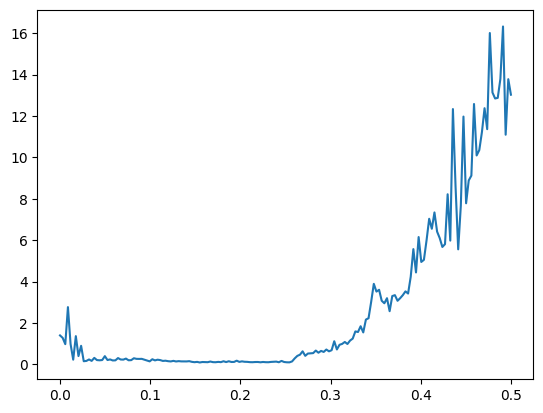

In [22]:
rnn = RNN(input_size=88, hidden_size=512, num_classes=88)
rnn = rnn.cuda()
lrs, losses = lrfinder(1e-4, 1e-1*5, rnn, trainset_loader)

The line of code `plt.plot(lrs[:15], losses[:15])` uses the `matplotlib.pyplot` module (commonly imported as `plt`) to create a plot. This particular function call plots the first 15 values from the `lrs` list against the first 15 values from the `losses` list. Here's a breakdown of what each part of the command does and why it might be used:

### Components of the Command:
1. **`plt.plot()`**: This is a function from the `matplotlib.pyplot` module that generates a line plot of the data provided to it. The basic syntax is `plt.plot(x, y)`, where `x` and `y` are sequences of numbers representing the X and Y coordinates of the plot points.

2. **`lrs[:15]`**: This is a slice of the `lrs` list, which contains learning rates tested during the execution of the `lrfinder` function. `lrs[:15]` retrieves the first 15 learning rates. This subset likely represents an early phase in the learning rate range where initial trends can be observed.

3. **`losses[:15]`**: Similar to the above, this slices the `losses` list to retrieve the first 15 recorded loss values corresponding to the first 15 learning rates. These values represent how the model's loss changed as the learning rate was increased.

### Purpose and Usage:
- **Visualizing Initial Trends**: The main purpose of this line is to visualize how the training loss responded to changes in the learning rate at the beginning of the range tested. This can be particularly useful for spotting immediate effects:
  - **Decreasing Loss**: If the plot shows a decreasing trend, it suggests that increases in the learning rate (up to a point) are beneficial and lead to faster reduction in loss.
  - **Increasing Loss**: An increasing trend could indicate that the model is struggling with higher learning rates, possibly due to instability or divergence in training.
- **Refining Learning Rate Choices**: By examining only the first 15 data points, you can focus on the initial behavior without the noise that might come from later points where the learning rate might be too high and cause erratic or divergent behavior in loss.

### Visualization Details:
- **Plotting**: After calling `plt.plot(lrs[:15], losses[:15])`, typical follow-up commands might include `plt.xlabel("Learning Rate")`, `plt.ylabel("Loss")`, and `plt.title("Learning Rate vs Loss")` to label the axes and title the plot appropriately.
- **Displaying the Plot**: To actually display the plot in a Python script or a Jupyter notebook, you would typically call `plt.show()` after setting up your plot commands.

This line is a straightforward yet powerful tool for tuning and visually understanding the impact of learning rate changes on model performance, especially useful during the exploratory phases of model training.

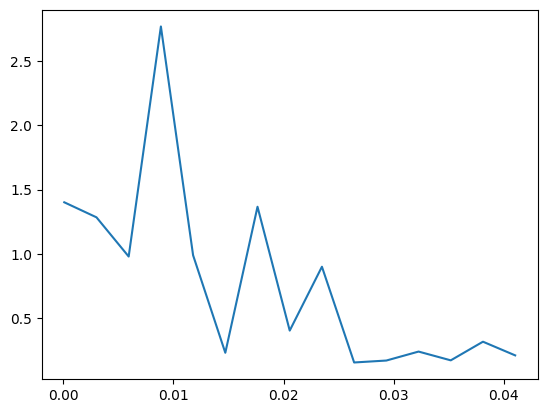

In [23]:
plt.plot(lrs[:15], losses[:15])

The code below includes a function for generating learning rates following a triangular policy and an example of how to apply this function to visualize the generated learning rates. Let's break down the code and its purpose:

### Function: `get_triangular_lr`
This function generates a sequence of learning rates that follows a triangular learning rate policy, which is a form of cyclical learning rate schedule. The idea behind cyclical learning rates is to vary the learning rate between a lower bound and an upper bound, rather than keeping it fixed or monotonically decreasing it.

#### Parameters:
- **`lr_low`**: The lower boundary of the learning rate range.
- **`lr_high`**: The upper boundary of the learning rate range.
- **`mini_batches`**: The total number of mini-batches over which the learning rate will cycle. This is typically equivalent to the number of mini-batches in an epoch.

#### Process:
1. **`iterations = mini_batches`**: Defines the total number of iterations (mini-batches) for the cycle.
2. **`lr_mid`**: Calculates an intermediate learning rate value. It is computed as a fraction (`1/7`) of `lr_high` added to `lr_low`. This value is used as a transitional point in the learning rate cycle.
3. **`up`**: Generates a linear space of learning rates increasing from `lr_low` to `lr_high`. The number of points generated is 35% of the total iterations, rounded to the nearest integer.
4. **`down`**: Generates a linear space of learning rates decreasing from `lr_high` to `lr_mid`. The number of points is the same proportion as in the `up` phase.
5. **`floor`**: Completes the cycle by decreasing from `lr_mid` back to `lr_low`, over 30% of the total iterations.
6. **`np.hstack([up, down[1:], floor])`**: Concatenates the three phases into a single array. The `down[1:]` slice is used to avoid duplicating the peak learning rate at the transition between `up` and `down`.

### Usage:
- **`lrs_triangular = get_triangular_lr(1e-2, 1e-2*3.5, len(trainset_loader))`**: Calls the function with specific parameters where:
  - `1e-2` is the lower boundary.
  - `1e-2*3.5` calculates the higher boundary as 3.5 times the lower boundary.
  - `len(trainset_loader)` passes the number of mini-batches (assuming this represents one full cycle or epoch).

### Visualization:
- **`plt.plot(lrs_triangular)`**: Plots the generated learning rates using `matplotlib.pyplot`. This visualization can show the triangular wave of learning rates, helping you to visually confirm the cyclical nature and the transitions between the phases.

### Benefits of Triangular Learning Rates:
Using a cyclical learning rate can help to:
- Avoid local minima in the optimization landscape.
- Potentially improve the convergence speed by periodically increasing the learning rate to allow for more explorative steps.

The triangular learning rate policy is particularly useful for training deep neural networks where the loss landscape can be complex, and avoiding poor local minima is crucial for achieving good performance. This strategy has been shown to be effective in practice, providing a straightforward approach to managing learning rate without requiring fine-tuned decay schedules or extensive hyperparameter tuning.

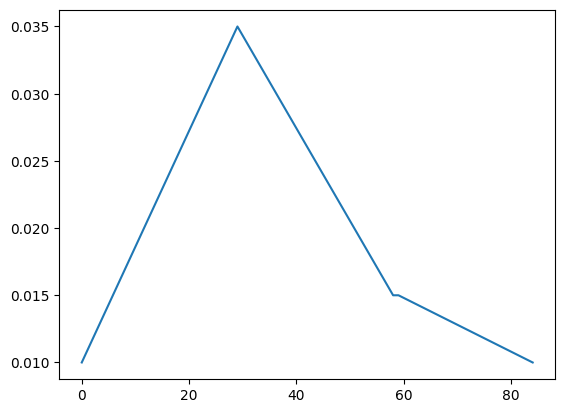

In [24]:
def get_triangular_lr(lr_low, lr_high, mini_batches):
    iterations = mini_batches
    lr_mid = lr_high/7 + lr_low
    up = np.linspace(lr_low, lr_high, int(round(iterations*0.35)))
    down = np.linspace(lr_high, lr_mid, int(round(iterations*0.35)))
    floor = np.linspace(lr_mid, lr_low, int(round(iterations*0.30)))
    return np.hstack([up, down[1:], floor])

lrs_triangular = get_triangular_lr(1e-2, 1e-2*3.5, len(trainset_loader))
plt.plot(lrs_triangular)

The line `clip = 1.0` sets a variable named `clip` to the value of `1.0`. This is typically used in the context of training neural networks, especially recurrent neural networks (RNNs) like LSTMs or GRUs, to perform what's known as "gradient clipping".

### Purpose of Gradient Clipping:
Gradient clipping is a technique used to prevent the problem of exploding gradients in deep neural networks. Exploding gradients occur when the gradients during backpropagation become too large, which can cause the model weights to update in extreme ways, potentially leading to an unstable training process where the model fails to converge or even diverges.

### How Gradient Clipping Works:
By setting `clip = 1.0`, you establish a threshold for the maximum allowed value of the gradients. Here’s how it is typically used:
- After computing the gradients of the loss with respect to the model parameters during backpropagation, you check if the norm (size/magnitude) of the gradients exceeds the value specified by `clip`.
- If the norm of the gradients is greater than `1.0`, you scale down the gradients proportionally so that their norm equals `1.0`. This ensures that the gradients do not exceed the defined threshold.
- This scaling helps control the updates to the model weights, preventing large jumps in the weight space, which can destabilize the training process.

### Implementation Example in PyTorch:
If you are using a framework like PyTorch, gradient clipping can be implemented as follows (assuming the variable `clip` has been set and you have a defined model and optimizer):
```python
torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
```
This line of code will clip the gradients of all parameters of the model such that their norm does not exceed `1.0`.

### When to Use Gradient Clipping:
Gradient clipping is particularly useful in the training of RNNs, where backpropagation through time (BPTT) can lead to very large gradients due to the accumulation of gradients over long sequences. However, it can also be beneficial in training other types of deep neural networks, especially in cases where the training process is unstable or very sensitive to the choice of learning rate.

Overall, the setting of `clip = 1.0` is a preparatory step for ensuring stable training dynamics in neural network training, particularly in environments susceptible to the exploding gradient problem.

In [25]:
clip = 1.0

The `train_model` function is a comprehensive routine to train a machine learning model, specifically a recurrent neural network, for a given number of epochs using a cyclical learning rate strategy. This function also incorporates model validation and implements early stopping by saving the model with the best validation performance. Let's break down the function:

### Parameters
- **`model`**: The neural network model to be trained.
- **`lrs_triangular`**: A list of learning rates to be applied over training iterations, following a triangular cyclical pattern.
- **`epochs_number=2`**: The default number of training epochs.
- **`wd=0.0`**: Weight decay parameter for the optimizer, which helps in regularization by penalizing large weights.
- **`best_val_loss=float("inf")`**: Keeps track of the best (lowest) validation loss encountered during training.

### Key Operations within the Function
1. **Initialization**:
   - **`loss_list`** and **`val_list`**: Lists to store the training and validation loss values respectively.
   - **`optimizer`**: Initializes an Adam optimizer with the first learning rate from `lrs_triangular` and the specified weight decay.

2. **Training Loop**:
   - Runs for a specified number of epochs. Each epoch consists of:
     - Setting the model to training mode (`model.train()`).
     - Iterating over batches of data provided by `trainset_loader`, with corresponding learning rates from `lrs_triangular`.
     - Setting the current learning rate for the optimizer.
     - **Data Preparation**: Processes each batch (likely involving padding, normalization, etc.), prepares it for GPU execution, and wraps it with `Variable` for automatic differentiation.
     - **Forward Pass**: Computes predictions (logits) from the model.
     - **Loss Calculation**: Calculates the loss using a criterion, typically cross-entropy for classification tasks.
     - **Backward Pass and Optimization**:
       - Clears old gradients (`optimizer.zero_grad()`).
       - Performs backpropagation (`loss.backward()`).
       - Applies gradient clipping to avoid exploding gradients.
       - Updates model parameters (`optimizer.step()`).

3. **Tracking and Reporting**:
   - **Training Loss for Epoch**: Calculated as the average of `epoch_loss`.
   - **Validation**:
     - Evaluates the model on a validation dataset using the `validate` function.
     - Appends validation loss to `val_list` and checks if it's the best seen so far. If it is, the model's parameters are saved to a file, and `best_val_loss` is updated.

4. **Print Statements**:
   - Provides feedback on the current training and validation loss after each epoch.

### Output
- **`best_val_loss`**: Returns the best validation loss achieved during training, useful for hyperparameter tuning and evaluation.

### Usage and Benefits
This training function is robust, incorporating several best practices:
- **Cyclical Learning Rates**: Enhances training efficiency and helps escape local minima.
- **Regularization**: Through weight decay and gradient clipping, it helps manage overfitting and unstable gradients.
- **Validation and Early Stopping**: Regular validation checks and saves the best-performing model, preventing overfitting to the training data.

Overall, the `train_model` function offers a detailed yet flexible approach to training deep learning models, particularly suited for tasks where managing learning rates dynamically can lead to better convergence behaviors.

In [26]:
def train_model(model, lrs_triangular, epochs_number=2, wd=0.0, best_val_loss=float("inf")):
    loss_list = []
    val_list =[]
    optimizer = torch.optim.Adam(rnn.parameters(), lr=lrs_triangular[0], weight_decay=wd)
    for epoch_number in range(epochs_number):
        model.train()
        epoch_loss = []
        for lr, batch in tqdm(zip(lrs_triangular, trainset_loader), total=len(trainset_loader)):
            optimizer.param_groups[0]['lr'] = lr

            post_processed_batch_tuple = post_process_sequence_batch(batch)

            input_sequences_batch, output_sequences_batch, sequences_lengths = post_processed_batch_tuple

            output_sequences_batch_var =  Variable( output_sequences_batch.contiguous().view(-1).cuda() )

            input_sequences_batch_var = Variable( input_sequences_batch.cuda() )

            optimizer.zero_grad()

            logits, _ = model(input_sequences_batch_var, sequences_lengths)

            loss = criterion(logits, output_sequences_batch_var)
            loss_list.append(loss.item())
            epoch_loss.append(loss.item())
            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), clip)

            optimizer.step()

        current_trn_epoch = sum(epoch_loss)/len(trainset_loader)
        print('Training Loss: Epoch:',epoch_number,':', current_trn_epoch)

        current_val_loss = validate(model)
        print('Validation Loss: Epoch:',epoch_number,':', current_val_loss)
        print('')

        val_list.append(current_val_loss)

        if current_val_loss < best_val_loss:

            torch.save(model.state_dict(), 'music_model_padfront_regularized.pth')
            best_val_loss = current_val_loss
    return best_val_loss

This sequence of commands sets up and begins the training of a recurrent neural network (RNN) model using a triangular learning rate policy and evaluates the model's performance based on its validation loss. Each step is crucial for the setup, training, and evaluation of the model:

### Step 1: Model Initialization
- **`rnn = RNN(input_size=88, hidden_size=512, num_classes=88)`**
  - **Initialization**: Creates an instance of the `RNN` class with specific parameters:
    - **`input_size=88`**: Likely represents the number of input features per timestep, which in the context of a music application, could correspond to the number of piano keys.
    - **`hidden_size=512`**: Specifies the size of the hidden layers in the RNN. A larger hidden size can allow the model to learn more complex patterns but also makes the model larger and potentially slower to train.
    - **`num_classes=88`**: Indicates the number of output classes, matching the input size, suggesting a task like next-note prediction or multi-label classification where each key's state (pressed or not) is predicted.
  
### Step 2: Move Model to GPU
- **`rnn = rnn.cuda()`**
  - Moves the RNN model's parameters and buffers to the GPU. This step is essential for leveraging GPU acceleration, which significantly speeds up the computations necessary for training deep learning models, especially with large datasets and complex models like RNNs.

### Step 3: Generate Learning Rates
- **`lrs_triangular = get_triangular_lr(1e-2, 1e-2*3.5, len(trainset_loader))`**
  - **Triangular Learning Rate Policy**: Calls the function `get_triangular_lr` with specific parameters to generate a sequence of learning rates that follow a triangular cyclical pattern:
    - **`1e-2`**: The starting and lowest learning rate.
    - **`1e-2*3.5`**: The highest learning rate, calculated as 3.5 times the lowest rate.
    - **`len(trainset_loader)`**: The total number of mini-batches, which defines the length of the learning rate schedule. This matches the total iterations in one epoch, assuming `trainset_loader` iterates over the entire training dataset once per epoch.

### Step 4: Train Model
- **`best_val_loss = train_model(rnn, lrs_triangular)`**
  - Begins training the model using the `train_model` function, which takes the following inputs:
    - **`rnn`**: The RNN model positioned on the GPU.
    - **`lrs_triangular`**: The cyclical learning rates generated in the previous step.
  - **Training and Evaluation**: The function trains the model for a number of epochs (default or specified), applies the cyclical learning rates, and validates the model's performance at the end of each epoch to track and potentially save the best model based on validation loss.
  - **Output**: The function returns the lowest validation loss encountered during the training, which serves as an indicator of the best model's performance on the validation dataset.

### Summary
The sequence of these commands effectively encapsulates the initialization, setup, training, and evaluation phases typical in machine learning workflows, particularly for deep learning models. Using a cyclical learning rate is a strategic approach that can potentially improve training speed and model performance by periodically allowing the model to escape local minima during training. The overall setup is geared towards achieving optimal performance on a music prediction task, utilizing GPU acceleration and sophisticated training regimens.

In [29]:
rnn = RNN(input_size=88, hidden_size=512, num_classes=88)
rnn = rnn.cuda()
lrs_triangular = get_triangular_lr(1e-2, 1e-2*3.5, len(trainset_loader))
best_val_loss = train_model(rnn, lrs_triangular)

  0%|          | 0/86 [00:00<?, ?it/s]

Training Loss: Epoch: 0 : 0.21987455624134042
Validation Loss: Epoch: 0 : 7.169033885574876e-07



  0%|          | 0/86 [00:00<?, ?it/s]

Training Loss: Epoch: 1 : 0.10157652320556862
Validation Loss: Epoch: 1 : 7.123060916561888e-07



The given sequence of commands below updates the learning rate strategy and continues the training of the `rnn` model, incorporating additional configurations such as a new range for the learning rate, increased regularization through weight decay, and continued monitoring of the best validation loss achieved so far. Let's dissect these commands:

### Step 1: Generate New Triangular Learning Rates
- **`lrs_triangular = get_triangular_lr(1e-3, 1e-2, len(trainset_loader))`**
  - This function call generates a new set of learning rates following a triangular pattern. Here’s what each parameter means:
    - **`1e-3`**: The new lower bound for the learning rate.
    - **`1e-2`**: The new upper bound for the learning rate.
    - **`len(trainset_loader)`**: This parameter is the length of the training set loader, indicating the number of batches in a single complete pass through the training data, used to determine how the learning rates are adjusted across one epoch.

  The triangular learning rate cycle varies between 0.001 and 0.01 throughout the batches. The purpose of cycling the learning rate is to allow the model to explore the loss landscape dynamically, potentially escaping local minima and smoothing out loss trajectories.

### Step 2: Continue Training with Updated Parameters
- **`best_val_loss = train_model(rnn, lrs_triangular, epochs_number=2, wd=1e-4, best_val_loss=best_val_loss)`**
  - This function call to `train_model` not only starts another phase of training but also utilizes the updated learning rates from `lrs_triangular`. Additional parameters are provided to configure the training:
    - **`rnn`**: The recurrent neural network model already instantiated and transferred to the GPU.
    - **`lrs_triangular`**: The cyclical learning rates generated above.
    - **`epochs_number=2`**: Specifies that the training should run for 2 epochs. This might be part of a strategy to incrementally refine the model over several short bursts of training.
    - **`wd=1e-4`**: Introduces weight decay of 0.0001 as a form of L2 regularization, which helps to prevent overfitting by penalizing large weights. This can be particularly important when retraining or further training a model, as it encourages simpler models that might generalize better.
    - **`best_val_loss=best_val_loss`**: Continues to use the previously recorded best validation loss as a benchmark to compare against. If the model achieves a lower validation loss in this new phase of training, it updates this benchmark and can save the model's state as the new best model.

### Output and Implications
- **`best_val_loss`**: After executing `train_model`, this variable will hold the best validation loss achieved across all training sessions so far, updated if a new lower loss was found during the current training phase.

### Summary
This approach illustrates a thoughtful and strategic method for training neural networks, particularly RNNs, which can be sensitive to the settings of hyperparameters like learning rates and regularization terms. By adjusting these settings and incrementally training with specific goals in mind (e.g., better generalization through weight decay, dynamic exploration of the parameter space via cyclical learning rates), the training process becomes more nuanced and potentially more effective at producing a robust model. This method also ensures that improvements are measured against a continuously updated benchmark of validation performance, reinforcing the focus on model generalization to unseen data.

In [30]:
lrs_triangular = get_triangular_lr(1e-3, 1e-2, len(trainset_loader))
best_val_loss = train_model(rnn, lrs_triangular, epochs_number=2, wd=1e-4, best_val_loss=best_val_loss)

  0%|          | 0/86 [00:00<?, ?it/s]

Training Loss: Epoch: 0 : 0.09869461515268614
Validation Loss: Epoch: 0 : 6.498899894368408e-07



  0%|          | 0/86 [00:00<?, ?it/s]

Training Loss: Epoch: 1 : 0.09851561807269274
Validation Loss: Epoch: 1 : 6.401679612893024e-07



In [31]:
lrs_triangular = get_triangular_lr(1e-4, 1e-2, len(trainset_loader))
best_val_loss = train_model(rnn, lrs_triangular, epochs_number=2, wd=1e-4*5, best_val_loss=best_val_loss)

  0%|          | 0/86 [00:00<?, ?it/s]

Training Loss: Epoch: 0 : 0.09879070546391398
Validation Loss: Epoch: 0 : 6.084485807938786e-07



  0%|          | 0/86 [00:00<?, ?it/s]

Training Loss: Epoch: 1 : 0.095723322830921
Validation Loss: Epoch: 1 : 6.007405908838557e-07



The code snippet below deals with loading a previously saved state dictionary into a recurrent neural network (RNN) model in PyTorch. This is a typical approach used in deep learning to resume training from a specific checkpoint or to perform inference using a trained model. Let’s break down the operations and their purposes:

### Loading the Model State Dictionary
- **`model_state_dict = torch.load('music_model_padfront_regularized.pth')`**
  - **`torch.load`**: This function loads a saved object (in this case, the state dictionary of a model) from a file. The file `'music_model_padfront_regularized.pth'` is expected to contain the model's parameters as saved at the end of a training process, where the model had achieved the best validation loss, given the name suggests regularization and possibly specific configurations (like padding at the front of sequences).
  - **`model_state_dict`**: This variable stores the loaded state dictionary. A state dictionary is a Python dictionary object that maps each layer to its parameter tensor. It does not contain the model class itself or any of the higher-level architecture, only the parameters.

### Assigning the Loaded State Dictionary to the Model
- **`rnn.load_state_dict(model_state_dict)`**
  - **`load_state_dict`**: This method of a PyTorch model is used to load the parameters from the state dictionary into the model. It expects a dictionary object, like the one loaded from the file. The keys of the dictionary must exactly match the names of the parameters in the model’s current architecture for this operation to succeed.
  - This operation is crucial for ensuring that the model exactly replicates the state it was in when the parameters were saved, allowing for continuity in training or direct use in inference.

### Commented Out Code
- **`#rnn.load_state_dict('music_model_padfront_regularized.pth')`**
  - This line is commented out and appears to be an incorrect usage example or a typo. The `load_state_dict` method expects a dictionary, not a string. If one were to attempt to execute this line, it would result in a TypeError because the method would not be able to interpret the string as a valid input. It seems to be an earlier attempt or a placeholder note that was correctly implemented in the two lines above.

### Summary
Loading a model's state dictionary is a common practice in machine learning:
- **Resuming Training**: If the training process was interrupted, or if you wish to continue training the model further with new data or for additional epochs.
- **Inference/Deployment**: To use the model for making predictions, typically after training has concluded and the model has been validated.

This procedure ensures that all model parameters are restored to their exact values from a specific training state, which is essential for the reproducibility of results and the effectiveness of the model in ongoing projects or production environments.

In [32]:
model_state_dict = torch.load('music_model_padfront_regularized.pth')
rnn.load_state_dict(model_state_dict)


#rnn.load_state_dict('music_model_padfront_regularized.pth')

<All keys matched successfully>

# Validation

The `sample_from_piano_rnn` function is designed to generate a sequence of piano notes from a trained recurrent neural network (RNN) model, which in this context is assumed to handle piano roll data. This function utilizes techniques such as temperature-based sampling to introduce variability in the generated sequences. Let's break down the function to understand each component:

### Function Parameters
- **`rnn`**: The trained RNN model to be used for generating music sequences.
- **`sample_length=4`**: The number of timesteps for which to generate the music. Each timestep corresponds to a set of piano keys being played.
- **`temperature=1`**: A parameter to scale the logits output by the model before applying softmax. Adjusting the temperature allows you to control the randomness in the generated sequence: lower temperatures lead to more deterministic outputs (less random), whereas higher temperatures increase diversity (more random).
- **`starting_sequence=None`**: Optionally, a specific starting sequence can be provided. If not provided, a default starting sequence is used.

### Key Steps in the Function
1. **Starting Sequence Initialization**:
   - If no starting sequence is provided, a default one is created with three specific notes set (though the code seems to have a mistake as it sets two notes to zero which does nothing). This sequence is then moved to the GPU for processing.
   - If a starting sequence is provided, it's used directly.

2. **Sequence Generation**:
   - **Initialization**: An initial hidden state is set to `None`, allowing the RNN to initialize its hidden state internally.
   - **Loop for Sequence Generation**:
     - The loop runs for the number of timesteps specified by `sample_length`.
     - At each timestep, the RNN predicts the next sequence based on the current input and the hidden state from the previous timestep.
     - The output from the RNN is transformed by dividing by the temperature and applying a softmax to convert logits to probabilities.
     - A new sequence input for the next timestep is sampled from these probabilities using `torch.multinomial`, which selects a note based on the computed probabilities.
     - This new sequence input is then used in the next iteration.

3. **Constructing the Final Output**:
   - The outputs across all timesteps are collected, concatenated, and converted to a NumPy array. This array represents the generated music sequence in a piano roll format, where each row corresponds to a timestep and each column to a piano key.

### Temperature and Sampling
- **Temperature Control**: By adjusting the `temperature` parameter, the function controls the "sharpness" of the probability distribution used for sampling. A high temperature makes the distribution more uniform (more explorative, less confident), while a low temperature makes the distribution peakier (more exploitative, more confident).
- **Sampling Method**: `torch.multinomial` provides a way to sample from the categorical distribution described by the softmax outputs, allowing for stochastic sampling of the next note based on the probabilities.

### Return Value
- **`sampled_sequence`**: The function returns the generated sequence as a NumPy array, suitable for further processing or conversion back into music files (e.g., MIDI).

### Summary
This function is an example of how to generate music using a trained RNN. It effectively demonstrates how to initialize a model, iteratively generate predictions, apply temperature adjustments to influence creativity or diversity in the output, and process the outputs into a human-readable or machine-usable format. The function is particularly useful in applications like automated music generation, where direct control over the style and variety of the generated content is desirable.

In [33]:
def sample_from_piano_rnn(rnn, sample_length=4, temperature=1, starting_sequence=None):

    if starting_sequence is None:
                
        current_sequence_input = torch.zeros(1, 1, 88)
        current_sequence_input[0, 0, 40] = 1
        current_sequence_input[0, 0, 50] = 0
        current_sequence_input[0, 0, 56] = 0
        current_sequence_input = Variable(current_sequence_input.cuda())
    else:
        current_sequence_input = starting_sequence
        
    final_output_sequence = [current_sequence_input.data.squeeze(1)]

    hidden = None

    for i in range(sample_length):

        output, hidden = rnn(current_sequence_input, [1], hidden)

        probabilities = nn.functional.softmax(output.div(temperature), dim=1)

        current_sequence_input = torch.multinomial(probabilities.data, 1).squeeze().unsqueeze(0).unsqueeze(1)

        current_sequence_input = Variable(current_sequence_input.float())

        final_output_sequence.append(current_sequence_input.data.squeeze(1))

    sampled_sequence = torch.cat(final_output_sequence, dim=0).cpu().numpy()
    
    return sampled_sequence

The code snippet below involves creating a dataset and setting up a data loader for testing a machine learning model, specifically in the context of generating musical notes. This setup is typical in machine learning workflows, especially in PyTorch, for handling data efficiently during model evaluation or inference. Here’s a breakdown of what each part of the code does:

### Step 1: Create the Dataset
- **`testset = NotesGenerationDataset('./Nottingham/test/', longest_sequence_length=None)`**
  - **`NotesGenerationDataset`**: This appears to be a custom dataset class, presumably defined elsewhere in your code. Custom dataset classes in PyTorch are usually derived from `torch.utils.data.Dataset` and are meant to handle specific types of data. In this case, the dataset is likely tailored to handle musical note data for a note generation task.
  - **Parameters**:
    - **`'./Nottingham/test/'`**: This is the path to the directory containing the test dataset. The dataset stored here is presumably in a format that `NotesGenerationDataset` can process (e.g., MIDI files, numpy arrays, or some other structured format specific to the task of music generation).
    - **`longest_sequence_length=None`**: By setting this parameter to `None`, the dataset will either process sequences as they are or determine the sequence length dynamically based on the data. This flexibility is often necessary for sequence models, especially in domains like music or text, where sequence lengths can vary significantly.

### Step 2: Set Up the DataLoader
- **`testset_loader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, drop_last=False)`**
  - **`torch.utils.data.DataLoader`**: This is a utility provided by PyTorch to handle the loading of generic data. It offers a way to iterate over datasets with options for batching, shuffling, and parallel processing.
  - **Parameters**:
    - **`testset`**: The dataset object created in the previous step.
    - **`batch_size=1`**: Specifies that the data loader should provide data in batches of 1. This setting is common in scenarios where the model evaluates one example at a time, which might be necessary for detailed analysis or when the model's computational requirements are high per sample.
    - **`shuffle=True`**: This parameter is set to shuffle the data, ensuring that the order of data fed to the model varies, thereby reducing the chance of model bias towards the sequence of data. However, in a test scenario, shuffling is usually not required unless used for specific reasons such as validating model robustness.
    - **`drop_last=False`**: Tells the DataLoader not to drop the last batch if it’s smaller than the specified `batch_size`. This ensures that all data points are evaluated, which is important in the test phase to get a complete picture of the model’s performance.

### Summary
This setup ensures that the test data can be efficiently and flexibly loaded into the model for evaluation, maintaining consistency with how data is typically processed in training while adjusting parameters appropriate for testing (e.g., batch size and shuffling). The flexibility in handling sequence lengths and the batch-wise processing of the data are particularly important for sequence generation models in music, allowing for accurate and comprehensive model evaluation.

In [34]:
testset = NotesGenerationDataset('./Music-Generation/notebooks/Nottingham/test/', longest_sequence_length=None)

testset_loader = torch.utils.data.DataLoader(testset, batch_size=1,shuffle=True, drop_last=False)

This code snippet below demonstrates how to handle a batch of data for testing or inference using a machine learning model, specifically within the PyTorch framework. Here, the code is part of a process to load, preprocess, and prepare a batch of sequences (likely music sequences) for input into a model. Let's break down each step and its purpose:

### Step 1: Retrieving a Batch of Data
- **`batch = next(iter(testset_loader))`**
  - This line retrieves the first batch of data from the `testset_loader`. The `iter()` function creates an iterator from the `DataLoader`, and `next()` fetches the first element from this iterator. This method is a common way to quickly grab a single batch from a dataset for testing, debugging, or other processing.

### Step 2: Post-Processing the Batch
- **`post_processed_batch_tuple = post_process_sequence_batch(batch)`**
  - `post_process_sequence_batch` is presumably a custom function defined elsewhere in your codebase. This function is intended to process the raw batch data into a format suitable for input into the neural network. This might include tasks such as normalization, padding, or other forms of sequence manipulation to ensure consistency in sequence length and format.

### Step 3: Unpacking Processed Data
- **`input_sequences_batch, output_sequences_batch, sequences_lengths = post_processed_batch_tuple`**
  - This line unpacks the tuple returned by the `post_process_sequence_batch` function into three components:
    - **`input_sequences_batch`**: This likely contains the input sequences for the model.
    - **`output_sequences_batch`**: This likely contains the target sequences against which the model's outputs will be compared during training or validation.
    - **`sequences_lengths`**: This array or list contains the lengths of each sequence in the batch, which is critical for processing variable-length sequences, particularly in models like RNNs that are sensitive to sequence length.

### Step 4: Preparing Variables for Model Input
- **`output_sequences_batch_var = output_sequences_batch.contiguous().view(-1).cuda()`**
  - **`.contiguous()`**: Ensures the tensor is stored in a contiguous block of memory (required for some operations that assume such storage).
  - **`.view(-1)`**: Reshapes the tensor to a 1D tensor, where `-1` instructs PyTorch to infer the necessary size to maintain the same number of elements.
  - **`.cuda()`**: Moves the tensor to the GPU, enabling faster computation by leveraging CUDA cores. This is necessary if the model is also on the GPU.
- **`input_sequences_batch_var = input_sequences_batch.cuda()`**
  - Similar to the above, this line moves the input sequences tensor to the GPU. No reshaping is done here, implying that the model expects the input as is.

### Step 5: Checking the Shape of the Input Tensor
- **`input_sequences_batch_var.shape`**
  - This command returns the shape of the `input_sequences_batch_var` tensor. Understanding the shape of the input tensor is crucial for debugging and ensuring that the model receives data in the correct format. This typically includes dimensions for batch size, sequence length, and features.

### Summary
This sequence of operations is typical in a testing or inference workflow where data must be loaded, processed, and transformed into a format suitable for the model. Each step ensures that data handling is efficient and compatible with the model's expectations, and moving data to the GPU is essential for leveraging hardware acceleration during model evaluation.

In [35]:
batch = next(iter(testset_loader))
post_processed_batch_tuple = post_process_sequence_batch(batch)

input_sequences_batch, output_sequences_batch, sequences_lengths = post_processed_batch_tuple

output_sequences_batch_var =  output_sequences_batch.contiguous().view(-1).cuda()

input_sequences_batch_var = input_sequences_batch.cuda()
input_sequences_batch_var.shape

torch.Size([216, 1, 88])

The code snippet below utilizes Matplotlib's `imshow` function to visualize an input sequence tensor as an image, where the tensor represents musical notes (likely in a piano roll format) processed for input into a neural network. Here’s a step-by-step explanation of what each part of this command does:

### Breaking Down the Command

1. **`input_sequences_batch_var.reshape((input_sequences_batch_var.shape[0], 88))`**:
   - **`.reshape()`**: This function is used to change the shape of the tensor without changing its data.
   - **`input_sequences_batch_var.shape[0]`**: This retrieves the size of the first dimension of the tensor, which is typically the batch size (i.e., the number of sequences in the batch).
   - **`88`**: Since piano rolls represent each possible piano key from the lowest to the highest pitch on a standard piano, this number likely represents the total number of keys or notes that can be played (indicating that each sequence has 88 potential notes).
   - The result is a 2D tensor where each row represents a sequence, and each column corresponds to one of the 88 piano keys.

2. **`.transpose(0,1)`**:
   - **`.transpose(0,1)`**: This method swaps the first dimension with the second. In the context of this tensor, it changes the layout so that each row now represents one piano key across different sequences/time steps, and each column represents different sequences. This orientation makes more visual sense for viewing sequences as it aligns time on the horizontal axis and different notes on the vertical axis.

3. **`plt.imshow(...)`**:
   - **`plt.imshow`**: This is a function from Matplotlib that displays data as an image, i.e., on a 2D regular raster. It's particularly useful for visualizing matrices where the intensity of each element can be represented by a color.
   - The data passed to `imshow` here is the transposed and reshaped tensor, effectively visualizing each sequence's notes as an image where likely, the presence of a note is indicated by a color and its absence by another (typically black for absence and a brighter color for presence).
   - This visualization helps in understanding the pattern of notes over sequences, which can be particularly useful for checking the preprocessing steps' correctness, understanding the model’s input format, or just visualizing the data for insights.

### Purpose and Usage

Visualizing sequence data like this is helpful when working with time series that represent categorical data, such as notes in music. It provides a quick and intuitive way to inspect the input data, ensuring that sequences are correctly formatted and understanding the data's structure and patterns. This can be crucial for debugging and for qualitative analysis of what the model is seeing as input.

In summary, this line of code transforms a batch of piano roll sequences into a form suitable for visual inspection, then displays it as an image, making it easier to interpret the sequence of musical notes across time visually.

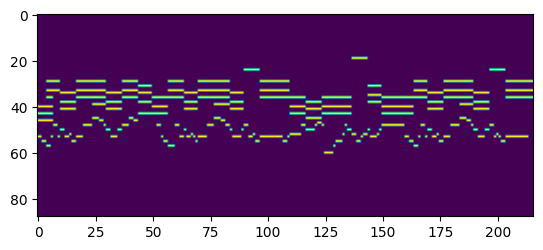

In [43]:
plt.imshow(input_sequences_batch_var.reshape((input_sequences_batch_var.shape[0],88)).transpose(0,1).cpu())

The code snippet below involves generating a music sequence using a recurrent neural network (RNN), visualizing the generated sequence as an image, and saving the sequence to a MIDI file. Let's break down each step to understand the process and the tools used:

### Step 1: Generate Music Sequence
- **`sample = sample_from_piano_rnn(rnn, sample_length=200, temperature=0.7, starting_sequence=None).transpose()`**
  - **`sample_from_piano_rnn`**: This is a custom function presumably designed to generate a sequence of piano notes using an RNN model. The parameters specify the characteristics of the sequence generation:
    - **`rnn`**: The trained RNN model used for generating the sequence.
    - **`sample_length=200`**: The length of the sequence to generate. In this context, it means the function will generate 200 time steps of music data.
    - **`temperature=0.7`**: A parameter that controls the randomness of the predictions. Lower values make the output more deterministic (and possibly more repetitive), while higher values increase randomness and diversity.
    - **`starting_sequence=None`**: No initial sequence is provided, so the model will start generating from a default or random initial state.
  - **`.transpose()`**: After generating the sample, it's transposed to swap the dimensions. This is typically done to align the dimensions correctly for subsequent processing or output, such as preparing the format for visualization or MIDI conversion.

### Step 2: Visualize the Generated Music
- **`io.imshow(sample)`**
  - **`io`**: This is likely an alias for `skimage.io`, a part of the scikit-image library used for I/O operations with images.
  - **`imshow`**: A function that displays an image (or in this case, a visualization of the music sequence). Each column in `sample` after transposition represents a different time step, and each row represents a different pitch. This visualization helps to see the pattern of notes over time.

### Step 3: Save the Music as a MIDI File
- **`midiwrite('sample_reg_018.mid', sample.transpose(), dt=0.3)`**
  - **`midiwrite`**: A function presumably part of a custom or third-party library used to write MIDI files.
  - **`'sample_reg_018.mid'`**: The name of the MIDI file to be saved.
  - **`sample.transpose()`**: Transposes the sample back to its original format, if necessary, for correct MIDI representation. This is important because the MIDI writing function might expect the time dimension to be along a specific axis.
  - **`dt=0.3`**: Specifies the time duration of each time step in the sample, measured in seconds. This setting affects how the timing is interpreted in the MIDI file, influencing the playback speed and rhythm.

### Summary
This sequence of commands demonstrates a complete workflow from generating a musical sequence using a deep learning model to visualizing that sequence and finally exporting it to a standard music file format (MIDI). This process not only leverages the predictive power of RNNs in generating structured sequence data but also involves practical applications like visualization and file output that are essential for real-world music generation projects.

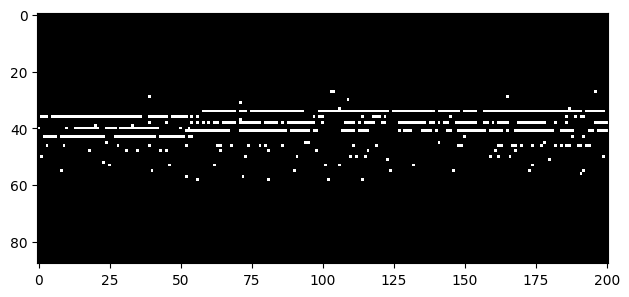

In [37]:
sample = sample_from_piano_rnn(rnn, sample_length=200, temperature=0.7,starting_sequence=None).transpose()
io.imshow(sample)
midiwrite('sample_reg_018_2.mid', sample.transpose(), dt=0.3)

The command `FileLink('sample_reg_018.mid')` is typically used in a Jupyter Notebook environment to provide a hyperlink to a file that is accessible on the local file system where the notebook server is running. This is particularly useful for allowing easy download of files generated during the execution of the notebook.

### Breakdown:

- **`FileLink`**: This is a function from the `IPython.display` module, which is used to display objects in various formats in Jupyter Notebooks.
- **`'sample_reg_018.mid'`**: Specifies the filename for which the link should be created. In this context, it refers to a MIDI file that was presumably generated and saved in the local directory of the notebook server.

### Purpose and Usage:

- **Convenience**: By generating a `FileLink`, you enable anyone viewing the notebook to easily download the MIDI file by simply clicking on the link. This is especially handy for sharing results like generated music files directly through the notebook interface without requiring users to navigate the file system manually.
- **Accessibility**: It makes accessing generated files straightforward, improving the workflow in environments like shared Jupyter servers, where direct access to the server's file system might not be available to all users.

### Typical Scenario:

After generating a music file (like a MIDI file in this case) during the execution of a notebook, you might want to listen to the music to assess its quality or share it with others. `FileLink` creates a direct download link in the notebook output, simplifying these tasks. This command is particularly valuable in educational and collaborative projects where multiple users may need to access and evaluate output files seamlessly.

In [38]:
FileLink('sample_reg_018_2.mid')

/home2/md.faizal/code/MGM-Spring-2024/A12/sample_reg_018_2.mid

The code snippet below demonstrates how to play an audio file directly within a Jupyter Notebook using the `IPython.display` module, specifically using the `Audio` class to embed an audio widget. Let's break down the commands and their functionality:

### Step 1: Import the Module
- **`import IPython.display as ipd`**
  - This command imports the `IPython.display` module and gives it the alias `ipd`. This module is part of IPython and provides a rich toolkit for interactive data visualization and output within Jupyter Notebooks. It supports displaying various multimedia formats including images, videos, audio, and other rich media types.

### Step 2: Display the Audio
- **`ipd.Audio('./sample_reg_018.mp3')`**
  - **`ipd.Audio`**: This function creates an audio control interface within the notebook. The audio control interface is an embedded HTML5 audio player that includes basic controls like play, pause, and volume.
  - **`'./sample_reg_018.mp3'`**: Specifies the path to the audio file. This path tells `Audio` where the audio file is located. In this case, it looks for a file named `sample_reg_018.mp3` in the same directory as the notebook (`./` denotes the current directory).

### Purpose and Usage
The use of `ipd.Audio` is particularly useful in scenarios where audio data is being manipulated or generated (such as in signal processing, music generation, or machine learning projects involving audio). By directly embedding an audio player into a Jupyter Notebook, you can:
- **Instantly Listen**: Test and listen to audio results immediately after they are generated or processed, without needing to leave the notebook or use an external media player.
- **Interactive Presentation**: Present work involving audio data interactively in a way that's easily accessible to collaborators or during educational demonstrations.
- **Debugging and Analysis**: Quickly check the outputs of audio processing pipelines to ensure that they are correct, which is crucial in projects where audio transformations or generation are involved.

### Example Use Case
If you're working on a machine learning project that involves generating or transforming audio files (such as converting text-to-speech, altering music files, or synthesizing new audio samples), having the ability to play back these files directly within your development environment (Jupyter Notebook) is extremely beneficial. It allows for seamless development and testing workflows, providing immediate feedback on the audio outputs your code produces.

In [44]:
import IPython.display as ipd
import librosa
audio_file = './sample_reg_018_2.mp3'
audio_data, sr = librosa.load(audio_file, sr=None)

# ipd.Audio('./sample_reg_018_2.mp3')
ipd.Audio(data=audio_data, rate=sr)